# Regression Analysis

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
from sklearn.model_selection import train_test_split


from sklearn.preprocessing import StandardScaler
from yellowbrick.regressor import ResidualsPlot

import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [2]:
def plot_residuals(x, y, title, standard=True):
    scaler = StandardScaler()
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=1)

    if standard:
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.fit_transform(X_test)

    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    # poly_model.fit(X_train_poly, Y_train)
    ax = plt.axes()
    ax.set_title(title)
    visualizer = ResidualsPlot(poly_model, ax=ax)
    visualizer.fit(X_train, Y_train)  # Fit the training data to the visualizer
    visualizer.score(X_test, Y_test)  # Evaluate the model on the test data
    visualizer.show()  # Finalize and render the figure

In [3]:
def compute_ols(x, y):
#     x1 = sm.add_constant(x)
    model = sm.OLS(y, x)
    res = model.fit()
    return res

In [4]:
def compute_ols_intercept(x, y):
    x1 = sm.add_constant(x)
    model = sm.OLS(y, x1)
    res = model.fit()
    return res

In [5]:
df = pd.read_csv('data/tobacco_data.csv')


df.head()

,Country,Year,Tobac_Use_M,Tobac_Use_F,Tax_2015,Happiness_Score,Afford_2015,Ban_Score_Dir_Ads,Ban_Score_Indr_Ads,Ban_Score_add_indir_ads,Warn_Score,Ban_Score_places
0,Albania,2015,51.2,7.6,65.195,4.959,3.920,8,8,3,50.0,8
1,Argentina,2015,29.5,18.4,75.045,6.574,1.310,7,10,5,50.0,8
2,Armenia,2015,52.3,1.5,34.165,4.350,3.945,5,2,0,50.0,3
3,Australia,2015,16.7,13.1,58.515,7.284,2.285,6,2,0,83.0,6
4,Austria,2015,35.5,34.8,74.835,7.200,1.225,7,8,5,65.0,2


In [6]:
y_f = df['Tobac_Use_F']
y_m = df['Tobac_Use_M']    

## Female Investigation

In [7]:
# Keep all columns
cols = ['Tax_2015',
           'Happiness_Score', 'Afford_2015', 'Ban_Score_Dir_Ads',
           'Ban_Score_Indr_Ads', 'Ban_Score_add_indir_ads', 'Warn_Score',
           'Ban_Score_places']

# Instantiate x
x = df[cols]


# Model with intercept and all features.
res_f_intercept = compute_ols_intercept(x, y_f)

# Model with intercept and all features.
res_f_no_intercept = compute_ols(x, y_f)


print("Female results with considering intercept:")
print(res_f_intercept.summary())

print("\n\n Female results without considering intercept:")
print(res_f_no_intercept.summary())



Female results with considering intercept:
                            OLS Regression Results                            
Dep. Variable:            Tobac_Use_F   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     10.16
Date:                Sun, 15 Mar 2020   Prob (F-statistic):           4.01e-10
Time:                        20:58:54   Log-Likelihood:                -354.48
No. Observations:                 103   AIC:                             727.0
Df Residuals:                      94   BIC:                             750.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

/home/andrew/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Explanation:

The coeficient R^2 values show that intercept just makes our model result worse. Which makes sense as by default we have no consideration about smoking.  

However, the p-values of other features show that only Tax and Affordability are significant features that we will keep them in our model.


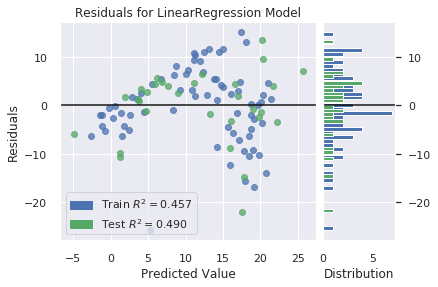

In [8]:
plot_residuals(x, y_f, 'Female_residual_errors', standard=True)

Residual errors show the skewness which could be because of it's data skewness. However, the value of error for train and test are close to each othe, which more important for our model.

### Remove prarmeters

In [9]:
# Just kept significant features (p-value =< 0.05)
cols = ['Tax_2015', 'Afford_2015']
x = df[cols]

# Removed intercept as it's not significant
res_f = compute_ols(x, y_f)

print("Male results:")
print(res_f.summary())

Male results:
                                 OLS Regression Results                                
Dep. Variable:            Tobac_Use_F   R-squared (uncentered):                   0.756
Model:                            OLS   Adj. R-squared (uncentered):              0.752
Method:                 Least Squares   F-statistic:                              156.9
Date:                Sat, 14 Mar 2020   Prob (F-statistic):                    1.05e-31
Time:                        11:36:19   Log-Likelihood:                         -356.53
No. Observations:                 103   AIC:                                      717.1
Df Residuals:                     101   BIC:                                      722.3
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

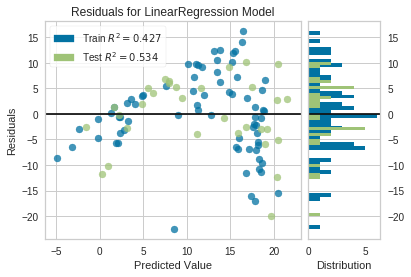

In [10]:
plot_residuals(x, y_f, 'Female_removed', standard=True)

The error of test is increased, meanwhile the error of train is decreased. Which can be assumed as overfitting. So it's better to keep all features as the controller features in the model.  

## Male Investigation

In [14]:

# Keep all columns
cols = ['Tax_2015', 'Happiness_Score', 'Afford_2015', 'Ban_Score_Dir_Ads',
        'Ban_Score_Indr_Ads', 'Ban_Score_add_indir_ads', 'Warn_Score',
        'Ban_Score_places']

# Instantiate x
x = df[cols]


# Model with intercept and all features.
res_m_with = compute_ols_intercept(x, y_m)


# Model without intercept and all features.
res_m_without = compute_ols(x, y_m)


print("Male results with considering intercept:")
print(res_m_with.summary())


print("Male results without considering intercept:")
print(res_m_without.summary())

Male results with considering intercept:
                            OLS Regression Results                            
Dep. Variable:            Tobac_Use_M   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     5.970
Date:                Sat, 14 Mar 2020   Prob (F-statistic):           3.49e-06
Time:                        11:43:39   Log-Likelihood:                -388.17
No. Observations:                 103   AIC:                             794.3
Df Residuals:                      94   BIC:                             818.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

/home/andrew/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Explanation:

As we expected from female investigation results, including coeficient in the model just deteriorates the R^2 scores, so it could be assumed as a candidate to be removed from our model, like what we did in the female investigation. However, the p-value for const here is close to zero, which means the constant value is a significant parameter. And so as the bias value (intercept) stands for all unknown prameters, we should consider that, there are many unknow parameters in our investigation. 

On the other side, the coeficient p-values show that the "indirect ban on advertisement" and "additional ban on advertisement" are not significant, and could be covered by "direct advertising score". And so, we see that "warnings" and "ban on places to be allowed for smoking" are not significant parameters which could be removed as well.

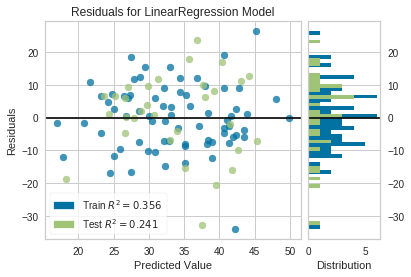

In [13]:
plot_residuals(x, y_m, 'Male', standard=True)

The destribution of error is fairly normal, but, the error of test is less than train, which could be assumed as underfitting.  

### Cleaned regression model

/home/andrew/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


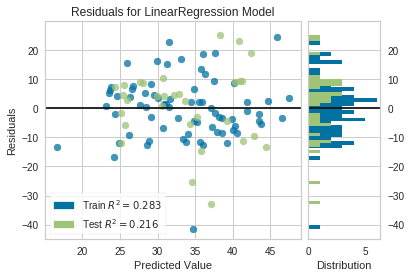

Male results:
                            OLS Regression Results                            
Dep. Variable:            Tobac_Use_M   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     17.50
Date:                Sat, 14 Mar 2020   Prob (F-statistic):           3.04e-07
Time:                        12:21:53   Log-Likelihood:                -393.87
No. Observations:                 103   AIC:                             793.7
Df Residuals:                     100   BIC:                             801.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              81.5799  

In [22]:
# Just significant features are remained.
cols = ['Happiness_Score',
        'Afford_2015']

x = df[cols]

# Do modeling without intercept, as it's not significant.
res_m = compute_ols_intercept(x, y_m)

plot_residuals(x, y_m, 'Male', standard=True)

print("Male results:")
print(res_m.summary())

### Worse results. Keep the parameters as controller.